### 10-1. 프로젝트: 한국어 데이터로 챗봇 만들기
영어로 만들었던 챗봇을 한국어 데이터로 바꿔서 훈련시켜봅시다.

시작하기 전에 우선 주요 라이브러리 버전을 확인해 봅시다.

In [1]:
import tensorflow

print(tensorflow.__version__)

2.6.0


#### Step 1. 데이터 수집하기
___
한국어 챗봇 데이터는 송영숙님이 공개한 챗봇 데이터를 사용합니다.

이 데이터는 아래의 링크에서 다운로드할 수 있습니다.

- [songys/Chatbot_data](https://github.com/songys/Chatbot_data/blob/master/ChatbotData.csv)  

```Cloud shell```에서 아래 명령어를 입력해 주세요.

```
$ mkdir -p ~/aiffel/transformer_chatbot/data/
$ ln -s ~/data/* ~/aiffel/transformer_chatbot/data/
```

#### Step 2. 데이터 전처리하기
___
영어 데이터와는 전혀 다른 데이터인 만큼 영어 데이터에 사용했던 전처리와 일부 동일한 전처리도 필요하겠지만 전체적으로는 다른 전처리를 수행해야 할 수도 있습니다.

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import re
import numpy as np
import matplotlib.pyplot as plt
print("슝=3")

# path_to_zip = tf.keras.utils.get_file(
#     'cornell_movie_dialogs.zip',
#     origin='http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip',
#     extract=True)

# path_to_dataset = os.path.join(
#     os.path.dirname(path_to_zip), "cornell movie-dialogs corpus")

# path_to_movie_lines = os.path.join(path_to_dataset, 'movie_lines.txt')
# path_to_movie_conversations = os.path.join(path_to_dataset,'movie_conversations.txt')
# print("슝=3")
path_to_csv = tf.keras.utils.get_file(
    'ChatbotData.csv',
    origin='https://raw.githubusercontent.com/songys/Chatbot_data/master/ChatbotData.csv',
    extract=False)

# path_to_dataset = os.path.dirname(path_to_csv)
path_to_chatbot_data = path_to_csv  # 단일 CSV 파일이므로 경로가 동일

print("슝=3")
import pandas as pd

# CSV 파일 읽어서 확인
chatbot_data = pd.read_csv(path_to_chatbot_data)
chatbot_data

# 사용할 샘플의 최대 개수
MAX_SAMPLES = 10000
print(MAX_SAMPLES)

# # 전처리 함수
# def preprocess_sentence(sentence):
#   # 입력받은 sentence를 소문자로 변경하고 양쪽 공백을 제거
#   sentence = sentence.lower().strip()# [[YOUR CODE]]

#   # 단어와 구두점(punctuation) 사이의 거리를 만듭니다.
#   # 예를 들어서 "I am a student." => "I am a student ."와 같이
#   # student와 온점 사이에 거리를 만듭니다.
#   sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
#   sentence = re.sub(r'[" "]+', " ", sentence)

#   # (a-z, A-Z, ".", "?", "!", ",")를 제외한 모든 문자를 공백인 ' '로 대체합니다.
#   sentence = re.sub(r'[^a-zA-Z.?!,]+', " ", sentence)# [[YOUR CODE]]
#   sentence = sentence.strip()
#   return sentence
# print("슝=3")
# 전처리 함수
def preprocess_sentence(sentence):
  # 입력받은 sentence의 양쪽 공백을 제거
  sentence = sentence.strip()
  
  # 단어와 구두점 사이의 거리를 만듭니다.
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  sentence = re.sub(r'[" "]+', " ", sentence)
  
  # 한글, 영문자, 구두점을 제외한 모든 문자를 공백으로 대체
  sentence = re.sub(r'[^가-힣a-zA-Z.?!,]+', " ", sentence)
  sentence = sentence.strip()
  return sentence
print("슝=3")

# # 질문과 답변의 쌍인 데이터셋을 구성하기 위한 데이터 로드 함수
# def load_conversations():
#   id2line = {}
#   with open(path_to_movie_lines, errors='ignore') as file:
#     lines = file.readlines()
#   for line in lines:
#     parts = line.replace('\n', '').split(' +++$+++ ')
#     id2line[parts[0]] = parts[4]

#   inputs, outputs = [], []
#   with open(path_to_movie_conversations, 'r') as file:
#     lines = file.readlines()

#   for line in lines:
#     parts = line.replace('\n', '').split(' +++$+++ ')
#     conversation = [line[1:-1] for line in parts[3][1:-1].split(', ')]

#     for i in range(len(conversation) - 1):
#       # 전처리 함수를 질문에 해당되는 inputs와 답변에 해당되는 outputs에 적용.
#       inputs.append(preprocess_sentence(id2line[conversation[i]]))
#       outputs.append(preprocess_sentence(id2line[conversation[i + 1]]))

#       if len(inputs) >= MAX_SAMPLES:
#         return inputs, outputs
#   return inputs, outputs
# print("슝=3")
# 질문과 답변의 쌍인 데이터셋을 구성하기 위한 데이터 로드 함수
def load_conversations():
  inputs, outputs = [], []
  
#   # CSV 파일 읽기
#   chatbot_data = pd.read_csv(path_to_chatbot_data)
  
  # 각 행의 질문과 답변을 리스트에 추가
  for idx, row in chatbot_data.iterrows():
    # 전처리 함수를 질문에 해당되는 inputs와 답변에 해당되는 outputs에 적용
    inputs.append(preprocess_sentence(row['Q']))
    outputs.append(preprocess_sentence(row['A']))
    
    if len(inputs) >= MAX_SAMPLES:
      return inputs, outputs
  
  return inputs, outputs

print("슝=3")

# 데이터를 로드하고 전처리하여 질문을 questions, 답변을 answers에 저장합니다.
questions, answers = load_conversations()
print('전체 샘플 수 :', len(questions))
print('전체 샘플 수 :', len(answers))

print('전처리 후의 22번째 질문 샘플: {}'.format(questions[21]))
print('전처리 후의 22번째 답변 샘플: {}'.format(answers[21]))

슝=3
슝=3
10000
슝=3
슝=3
전체 샘플 수 : 10000
전체 샘플 수 : 10000
전처리 후의 22번째 질문 샘플: 가스비 장난 아님
전처리 후의 22번째 답변 샘플: 다음 달에는 더 절약해봐요 .


#### Step 3. SubwordTextEncoder 사용하기
___
한국어 데이터는 형태소 분석기를 사용하여 토크나이징을 해야 한다고 많은 분이 알고 있습니다. 하지만 여기서는 형태소 분석기가 아닌 위 실습에서 사용했던 내부 단어 토크나이저인 ```SubwordTextEncoder```를 그대로 사용해보세요.

In [3]:
import tensorflow_datasets as tfds
print("살짝 오래 걸릴 수 있어요. 스트레칭 한 번 해볼까요? 👐")

# 질문과 답변 데이터셋에 대해서 Vocabulary 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)
print("슝=3 ")

# 시작 토큰과 종료 토큰에 고유한 정수를 부여합니다.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]
print("슝=3")

print('START_TOKEN의 번호 :' ,[tokenizer.vocab_size])
print('END_TOKEN의 번호 :' ,[tokenizer.vocab_size + 1])

# 시작 토큰과 종료 토큰을 고려하여 +2를 하여 단어장의 크기를 산정합니다.
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

살짝 오래 걸릴 수 있어요. 스트레칭 한 번 해볼까요? 👐
슝=3 
슝=3
START_TOKEN의 번호 : [8815]
END_TOKEN의 번호 : [8816]
8817


In [4]:
# 임의의 22번째 샘플에 대해서 정수 인코딩 작업을 수행.
# 각 토큰을 고유한 정수로 변환
print('정수 인코딩 후의 21번째 질문 샘플: {}'.format(tokenizer.encode(questions[21])))
print('정수 인코딩 후의 21번째 답변 샘플: {}'.format(tokenizer.encode(answers[21])))

# 샘플의 최대 허용 길이 또는 패딩 후의 최종 길이
MAX_LENGTH = 40
print(MAX_LENGTH)

# 정수 인코딩, 최대 길이를 초과하는 샘플 제거, 패딩
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []
  
  for (sentence1, sentence2) in zip(inputs, outputs):
    # 정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    # 최대 길이 40 이하인 경우에만 데이터셋으로 허용
    if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
      tokenized_inputs.append(sentence1)
      tokenized_outputs.append(sentence2)
  
  # 최대 길이 40으로 모든 데이터셋을 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
  
  return tokenized_inputs, tokenized_outputs
print("슝=3")

questions, answers = tokenize_and_filter(questions, answers)
print('단어장의 크기 :',(VOCAB_SIZE))
print('필터링 후의 질문 샘플 개수: {}'.format(len(questions)))
print('필터링 후의 답변 샘플 개수: {}'.format(len(answers)))

정수 인코딩 후의 21번째 질문 샘플: [8533, 3642, 7119]
정수 인코딩 후의 21번째 답변 샘플: [1763, 5683, 7, 4724, 115, 1]
40
슝=3
단어장의 크기 : 8817
필터링 후의 질문 샘플 개수: 10000
필터링 후의 답변 샘플 개수: 10000


In [5]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더는 이전의 target을 다음의 input으로 사용합니다.
# 이에 따라 outputs에서는 START_TOKEN을 제거하겠습니다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
print("슝=3")

슝=3


#### Step 4. 모델 구성하기
___
위 실습 내용을 참고하여 트랜스포머 모델을 구현합니다.

슝=3


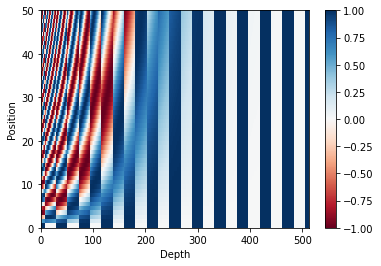

슝=3
슝=3
슝=3
슝=3
슝=3
슝=3
슝=3
슝=3


In [6]:
# 포지셔널 인코딩 레이어
class PositionalEncoding(tf.keras.layers.Layer):

  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    # 각도 배열 생성
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)

    # 배열의 짝수 인덱스에는 sin 함수 적용
    sines = tf.math.sin(angle_rads[:, 0::2])
    # 배열의 홀수 인덱스에는 cosine 함수 적용
    cosines = tf.math.cos(angle_rads[:, 1::2])

    # sin과 cosine이 교차되도록 재배열
    pos_encoding = tf.stack([sines, cosines], axis=0)
    pos_encoding = tf.transpose(pos_encoding,[1, 2, 0]) 
    pos_encoding = tf.reshape(pos_encoding, [position, d_model])

    pos_encoding = pos_encoding[tf.newaxis, ...]
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

print("슝=3")

sample_pos_encoding = PositionalEncoding(50, 512)

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

# 스케일드 닷 프로덕트 어텐션 함수
def scaled_dot_product_attention(query, key, value, mask):
  # 어텐션 가중치는 Q와 K의 닷 프로덕트
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # 가중치를 정규화
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # 패딩에 마스크 추가
  if mask is not None:
    logits += (mask * -1e9)

  # softmax적용
  attention_weights = tf.nn.softmax(logits, axis=-1)

  # 최종 어텐션은 가중치와 V의 닷 프로덕트
  output = tf.matmul(attention_weights, value)
  return output

print("슝=3")

class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    self.dense = tf.keras.layers.Dense(units=d_model)

  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # Q, K, V에 각각 Dense를 적용합니다
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # 병렬 연산을 위한 머리를 여러 개 만듭니다
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # 스케일드 닷 프로덕트 어텐션 함수
    scaled_attention = scaled_dot_product_attention(query, key, value, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # 어텐션 연산 후에 각 결과를 다시 연결(concatenate)합니다
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # 최종 결과에도 Dense를 한 번 더 적용합니다
    outputs = self.dense(concat_attention)

    return outputs
print("슝=3")

def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, sequence length)
  return mask[:, tf.newaxis, tf.newaxis, :]
print("슝=3")
# print(create_padding_mask(tf.constant([[1, 2, 0, 3, 0], [0, 0, 0, 4, 5]])))

def create_look_ahead_mask(x):
  seq_len = tf.shape(x)[1]
  look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  padding_mask = create_padding_mask(x)
  return tf.maximum(look_ahead_mask, padding_mask)
print("슝=3")
# print(create_look_ahead_mask(tf.constant([[1, 2, 3, 4, 5]])))
# print(create_look_ahead_mask(tf.constant([[0, 5, 1, 5, 5]])))

# 인코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 두 개의 서브 레이어가 존재합니다.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

  # 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })

  # 어텐션의 결과는 Dropout과 Layer Normalization이라는 훈련을 돕는 테크닉을 수행
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # 두 번째 서브 레이어 : 2개의 완전연결층
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("슝=3")

def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 임베딩 레이어
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # 포지셔널 인코딩
  max_position = 100
  embeddings = PositionalEncoding(max_position, d_model)(embeddings)#  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # num_layers만큼 쌓아올린 인코더의 층.
  for i in range(num_layers):
    outputs = encoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("슝=3")

# 디코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 세 개의 서브 레이어가 존재합니다.
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 첫 번째 서브 레이어 : 마스크드 멀티 헤드 어텐션 수행 (셀프 어텐션)
  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': look_ahead_mask
      })

  # 멀티 헤드 어텐션의 결과는 LayerNormalization이라는 훈련을 돕는 테크닉을 수행(+ 잔차 연결(residual connection))
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  # 두 번째 서브 레이어 : 인코더-디코더 어텐션 수행
  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1,
          'key': enc_outputs,
          'value': enc_outputs,
          'mask': padding_mask
      })

  # 인코더-디코더 어텐션의 결과는
  # Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행(+ 잔차 연결)
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

  # 세 번째 서브 레이어 : 2개의 완전연결층
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층(피드포워드 신경망)의 결과는 Dropout과 LayerNormalization 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)
print("슝=3")

def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')

  # 패딩 마스크
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
  
  # 임베딩 레이어
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # 포지셔널 인코딩
  max_position = 100
  embeddings = PositionalEncoding(max_position, d_model)(embeddings)#   embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  # Dropout이라는 훈련을 돕는 테크닉을 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  for i in range(num_layers):
    outputs = decoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)
print("슝=3")

슝=3
Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    3311360     inputs[0][0]                     
                                                                 enc_padding_mask[0]

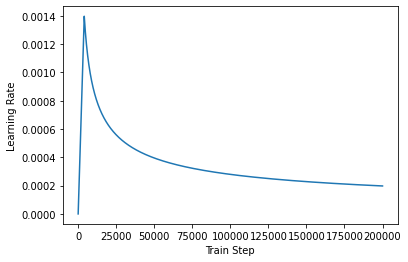

In [7]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  # 인코더에서 패딩을 위한 마스크
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # 디코더에서 미래의 토큰을 마스크 하기 위해서 사용합니다.
  # 내부적으로 패딩 마스크도 포함되어져 있습니다.
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask,
      output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

  # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
  # 디코더에서 패딩을 위한 마스크
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  # 인코더
  enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[inputs, enc_padding_mask])

  # 디코더
  dec_outputs = decoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # 완전연결층
  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)
print("슝=3")

tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

def loss_function(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  
  loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)

  return tf.reduce_mean(loss)
print("슝=3")

class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps**-1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
print("슝=3")

sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
print("슝=3")

EPOCHS = 10
model.fit(dataset, epochs=EPOCHS, verbose=1)

#### Step 5. 모델 평가하기
___
Step 1에서 선택한 전처리 방법을 고려하여 입력된 문장에 대해서 대답을 얻는 예측 함수를 만듭니다.

In [8]:
def decoder_inference(sentence):
  sentence = preprocess_sentence(sentence)

  # 입력된 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰을 앞뒤로 추가.
  # ex) Where have you been? → [[8331   86   30    5 1059    7 8332]]
  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
  # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장. ex) 8331
  output_sequence = tf.expand_dims(START_TOKEN, 0)

  # 디코더의 인퍼런스 단계
  for i in range(MAX_LENGTH):
    # 디코더는 최대 MAX_LENGTH의 길이만큼 다음 단어 예측을 반복합니다.
    predictions = model(inputs=[sentence, output_sequence], training=False)
    predictions = predictions[:, -1:, :]

    # 현재 예측한 단어의 정수
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 현재 예측한 단어가 종료 토큰이라면 for문을 종료
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # 예측한 단어들은 지속적으로 output_sequence에 추가됩니다.
    # 이 output_sequence는 다시 디코더의 입력이 됩니다.
    output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

  return tf.squeeze(output_sequence, axis=0)
print("슝=3")

def sentence_generation(sentence):
  # 입력 문장에 대해서 디코더를 동작 시켜 예측된 정수 시퀀스를 리턴받습니다.
  prediction = decoder_inference(sentence)

  # 정수 시퀀스를 다시 텍스트 시퀀스로 변환합니다.
  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('입력 : {}'.format(sentence))
  print('출력 : {}'.format(predicted_sentence))

  return predicted_sentence
print("슝=3")

# sentence_generation('Where have you been?')
sentence_generation('너는 어디에 있었어요?')

# sentence_generation("It's a trap")
sentence_generation("그건 함정이에요.")

슝=3
슝=3
입력 : 너는 어디에 있었어요?
출력 : 마음이 복잡하겠어요 .
입력 : 그건 함정이에요.
출력 : 많이 만나보세요 .


'많이 만나보세요 .'

#### 성능↑
1.논문 형식 따르기
---
- 논문에서 num_layers는 6, d-Model은 512였지만, 빠르고 원활한 훈련을 버림
- 모델 생성부터 다시

In [9]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 6#2 # 인코더와 디코더의 층의 개수
D_MODEL = 512#256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

second_model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

second_model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 512)    13982208    inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

In [10]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

second_model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
print("슝=3")

슝=3


In [11]:
EPOCHS = 10
second_model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/10
157/157 [==============================] - 52s 233ms/step - loss: 1.3173 - accuracy: 0.0219
Epoch 2/10
157/157 [==============================] - 37s 235ms/step - loss: 1.0583 - accuracy: 0.0459
Epoch 3/10
157/157 [==============================] - 36s 232ms/step - loss: 0.9502 - accuracy: 0.0498
Epoch 4/10
157/157 [==============================] - 37s 234ms/step - loss: 0.9007 - accuracy: 0.0511
Epoch 5/10
157/157 [==============================] - 37s 233ms/step - loss: 0.8692 - accuracy: 0.0528
Epoch 6/10
157/157 [==============================] - 37s 233ms/step - loss: 0.8397 - accuracy: 0.0545
Epoch 7/10
157/157 [==============================] - 37s 233ms/step - loss: 0.8033 - accuracy: 0.0572
Epoch 8/10
157/157 [==============================] - 37s 234ms/step - loss: 0.7592 - accuracy: 0.0597
Epoch 9/10
157/157 [==============================] - 37s 234ms/step - loss: 0.7061 - accuracy: 0.0638
Epoch 10/10
157/157 [==============================] - 37s 234ms/step - l

#### 성능↑
2.기존 epoch 횟수 늘리기
---
- 모델 생성부터 다시
- 10 → 100

In [12]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

third_model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

third_model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    3311360     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

In [13]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

third_model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
print("슝=3")

슝=3


In [14]:
EPOCHS = 100
third_model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/100
157/157 [==============================] - 14s 58ms/step - loss: 1.4232 - accuracy: 0.0236
Epoch 2/100
157/157 [==============================] - 9s 58ms/step - loss: 1.1937 - accuracy: 0.0491
Epoch 3/100
157/157 [==============================] - 9s 58ms/step - loss: 0.9964 - accuracy: 0.0499
Epoch 4/100
157/157 [==============================] - 9s 58ms/step - loss: 0.9033 - accuracy: 0.0523
Epoch 5/100
157/157 [==============================] - 9s 58ms/step - loss: 0.8492 - accuracy: 0.0550
Epoch 6/100
157/157 [==============================] - 9s 58ms/step - loss: 0.7984 - accuracy: 0.0578
Epoch 7/100
157/157 [==============================] - 9s 58ms/step - loss: 0.7441 - accuracy: 0.0618
Epoch 8/100
157/157 [==============================] - 9s 58ms/step - loss: 0.6841 - accuracy: 0.0677
Epoch 9/100
157/157 [==============================] - 9s 58ms/step - loss: 0.6168 - accuracy: 0.0756
Epoch 10/100
157/157 [==============================] - 9s 58ms/step - loss: 0.54

157/157 [==============================] - 9s 58ms/step - loss: 0.0020 - accuracy: 0.1661
Epoch 81/100
157/157 [==============================] - 9s 58ms/step - loss: 0.0023 - accuracy: 0.1661
Epoch 82/100
157/157 [==============================] - 9s 57ms/step - loss: 0.0021 - accuracy: 0.1661
Epoch 83/100
157/157 [==============================] - 9s 57ms/step - loss: 0.0019 - accuracy: 0.1662
Epoch 84/100
157/157 [==============================] - 9s 58ms/step - loss: 0.0019 - accuracy: 0.1661
Epoch 85/100
157/157 [==============================] - 9s 58ms/step - loss: 0.0018 - accuracy: 0.1662
Epoch 86/100
157/157 [==============================] - 9s 58ms/step - loss: 0.0017 - accuracy: 0.1662
Epoch 87/100
157/157 [==============================] - 9s 58ms/step - loss: 0.0018 - accuracy: 0.1662
Epoch 88/100
157/157 [==============================] - 9s 58ms/step - loss: 0.0018 - accuracy: 0.1662
Epoch 89/100
157/157 [==============================] - 9s 58ms/step - loss: 0.0016 - 

#### 성능↑
3.모델 구조 바꾸기
---
- 모델 정의부터 다시
- dropout 증가, weight decay 추가, early stopping을 적용

In [17]:
# 모델 초기화
tf.keras.backend.clear_session()

# 하이퍼파라미터 설정 (드롭아웃 증가)
NUM_LAYERS = 2 
D_MODEL = 256 
NUM_HEADS = 8 
UNITS = 512 
DROPOUT = 0.3  # 0.1에서 0.3으로 증가

# weight decay를 위한 함수
def add_weight_decay(model, weight_decay):
    if weight_decay is None or weight_decay == 0:
        return
    
    # 모든 학습 가능한 레이어에 L2 regularization 추가
    for layer in model.layers:
        if hasattr(layer, 'kernel_regularizer'):
            layer.kernel_regularizer = tf.keras.regularizers.l2(weight_decay)
        if hasattr(layer, 'bias_regularizer'):
            layer.bias_regularizer = tf.keras.regularizers.l2(weight_decay)

# 모델 생성
forth_model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

# Weight decay (L2 regularization) 적용
add_weight_decay(forth_model, 0.0001)

forth_model.summary()

# 손실 함수 (label smoothing 제거)
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    
    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, 
        reduction='none'
    )(y_true, y_pred)
    
    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)
    return tf.reduce_mean(loss)

# 만약 label smoothing을 구현하고 싶다면:
def loss_function_with_label_smoothing(y_true, y_pred, smoothing=0.1):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    
    # Label smoothing 수동 구현
    y_true_one_hot = tf.one_hot(y_true, depth=VOCAB_SIZE)
    y_true_smoothed = y_true_one_hot * (1.0 - smoothing) + smoothing / VOCAB_SIZE
    
    loss = tf.keras.losses.CategoricalCrossentropy(
        from_logits=True, 
        reduction='none'
    )(y_true_smoothed, y_pred)
    
    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)
    return tf.reduce_mean(loss)

# 학습률 스케줄러
learning_rate = CustomSchedule(D_MODEL)

# Optimizer (gradient clipping 추가)
optimizer = tf.keras.optimizers.Adam(
    learning_rate, 
    beta_1=0.9, 
    beta_2=0.98, 
    epsilon=1e-9,
    clipnorm=1.0  # gradient clipping 추가
)

# 정확도 함수
def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

# 모델 컴파일
# model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
# Label smoothing을 사용하는 경우
forth_model.compile(optimizer=optimizer, loss=lambda y_true, y_pred: loss_function_with_label_smoothing(y_true, y_pred, smoothing=0.1), metrics=[accuracy])

# Early stopping 콜백
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',  # validation 데이터가 있다면 'val_loss' 사용
    patience=10,     # 10 epoch 동안 개선이 없으면 중단
    restore_best_weights=True,  # 최적의 가중치로 복구
    verbose=1
)

# 학습률 감소 콜백
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='loss',  # validation 데이터가 있다면 'val_loss' 사용
    factor=0.5,      # 학습률을 절반으로 감소
    patience=5,      # 5 epoch 동안 개선이 없으면 학습률 감소
    min_lr=1e-6,     # 최소 학습률
    verbose=1
)

# 모델 체크포인트 콜백
checkpoint_path = "transformer_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='loss',  # validation 데이터가 있다면 'val_loss' 사용
    save_best_only=True,
    verbose=1
)

# 학습
EPOCHS = 100
forth_model.fit(
    dataset, 
    epochs=EPOCHS, 
    verbose=1,
    callbacks=[early_stopping, reduce_lr, checkpoint_callback]
)

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    3311360     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

157/157 [==============================] - 10s 62ms/step - loss: 0.2808 - accuracy: 0.1528

Epoch 00030: loss improved from 0.28633 to 0.28076, saving model to transformer_checkpoint
Epoch 31/100
157/157 [==============================] - 10s 62ms/step - loss: 0.2771 - accuracy: 0.1538

Epoch 00031: loss improved from 0.28076 to 0.27707, saving model to transformer_checkpoint
Epoch 32/100
157/157 [==============================] - 10s 62ms/step - loss: 0.2735 - accuracy: 0.1545

Epoch 00032: loss improved from 0.27707 to 0.27353, saving model to transformer_checkpoint
Epoch 33/100
157/157 [==============================] - 10s 62ms/step - loss: 0.2695 - accuracy: 0.1558

Epoch 00033: loss improved from 0.27353 to 0.26949, saving model to transformer_checkpoint
Epoch 34/100
157/157 [==============================] - 10s 63ms/step - loss: 0.2670 - accuracy: 0.1568

Epoch 00034: loss improved from 0.26949 to 0.26700, saving model to transformer_checkpoint
Epoch 35/100
157/157 [===========

157/157 [==============================] - 10s 62ms/step - loss: 0.2368 - accuracy: 0.1646

Epoch 00072: loss improved from 0.23747 to 0.23682, saving model to transformer_checkpoint
Epoch 73/100
157/157 [==============================] - 10s 62ms/step - loss: 0.2372 - accuracy: 0.1643

Epoch 00073: loss did not improve from 0.23682
Epoch 74/100
157/157 [==============================] - 10s 62ms/step - loss: 0.2370 - accuracy: 0.1644

Epoch 00074: loss did not improve from 0.23682
Epoch 75/100
157/157 [==============================] - 10s 62ms/step - loss: 0.2365 - accuracy: 0.1646

Epoch 00075: loss improved from 0.23682 to 0.23653, saving model to transformer_checkpoint
Epoch 76/100
157/157 [==============================] - 10s 61ms/step - loss: 0.2364 - accuracy: 0.1646

Epoch 00076: loss improved from 0.23653 to 0.23637, saving model to transformer_checkpoint
Epoch 77/100
157/157 [==============================] - 10s 61ms/step - loss: 0.2366 - accuracy: 0.1644

Epoch 00077: los

#### 성능↑
4.한국어 토크나이저가 제대로 작동 - 데이터 전처리 문제
---
- 토크나이징부터 다시 (형태소 분석기를 사용 - ∵ 한국어 데이터)
- BertTokenizer → 'klue/bert-base'

In [19]:
# 필요한 라이브러리 설치 (한 번만 실행)
# !pip install transformers

from transformers import BertTokenizer
import tensorflow as tf

# 원본 텍스트 데이터를 다시 로드
questions, answers = load_conversations()
print(f"원본 텍스트 데이터 로드 완료: {len(questions)}개")

print("한국어 특화 토크나이저를 불러오는 중... 👐")

# 한국어 BERT 토크나이저 사용
tokenizer = BertTokenizer.from_pretrained('klue/bert-base')
print("슝=3 ")

# 특수 토큰 설정 (BERT의 기본 특수 토큰 사용)
START_TOKEN = tokenizer.cls_token_id  # [CLS] 토큰
END_TOKEN = tokenizer.sep_token_id    # [SEP] 토큰
print("슝=3")

print('START_TOKEN의 번호 :', START_TOKEN)
print('END_TOKEN의 번호 :', END_TOKEN)

# BERT 토크나이저의 vocab size 사용
VOCAB_SIZE = tokenizer.vocab_size
print(VOCAB_SIZE)

# 인코딩 테스트 (원본 텍스트 데이터 사용)
print('원본 21번째 질문: {}'.format(questions[21]))
print('원본 21번째 답변: {}'.format(answers[21]))
print('정수 인코딩 후의 21번째 질문 샘플: {}'.format(tokenizer.encode(questions[21], add_special_tokens=False)))
print('정수 인코딩 후의 21번째 답변 샘플: {}'.format(tokenizer.encode(answers[21], add_special_tokens=False)))

MAX_LENGTH = 40
print(MAX_LENGTH)

def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []
    
    for (sentence1, sentence2) in zip(inputs, outputs):
        # BERT 토크나이저의 encode 메서드 사용
        # add_special_tokens=False로 설정하여 수동으로 특수 토큰 추가
        sentence1 = [START_TOKEN] + tokenizer.encode(sentence1, add_special_tokens=False) + [END_TOKEN]
        sentence2 = [START_TOKEN] + tokenizer.encode(sentence2, add_special_tokens=False) + [END_TOKEN]
        
        if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
            tokenized_inputs.append(sentence1)
            tokenized_outputs.append(sentence2)
    
    # 패딩 적용
    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
    
    return tokenized_inputs, tokenized_outputs

print("슝=3")

# 원본 텍스트 데이터를 토크나이징
questions, answers = tokenize_and_filter(questions, answers)
print('단어장의 크기 :', VOCAB_SIZE)
print('필터링 후의 질문 샘플 개수: {}'.format(len(questions)))
print('필터링 후의 답변 샘플 개수: {}'.format(len(answers)))

BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 데이터셋 생성
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
print("슝=3")

# 토큰을 텍스트로 변환하는 함수 (디버깅용)
def decode_tokens(token_ids):
    """토큰 ID를 텍스트로 디코딩"""
    return tokenizer.decode(token_ids, skip_special_tokens=False)

# 인코딩/디코딩 테스트
test_sentence = "안녕하세요. 오늘 날씨가 좋네요."
encoded = tokenizer.encode(test_sentence, add_special_tokens=False)
decoded = decode_tokens(encoded)
print(f"원본: {test_sentence}")
print(f"인코딩: {encoded}")
print(f"디코딩: {decoded}")

원본 텍스트 데이터 로드 완료: 10000개
한국어 특화 토크나이저를 불러오는 중... 👐
슝=3 
슝=3
START_TOKEN의 번호 : 2
END_TOKEN의 번호 : 3
32000
원본 21번째 질문: 가스비 장난 아님
원본 21번째 답변: 다음 달에는 더 절약해봐요 .
정수 인코딩 후의 21번째 질문 샘플: [5809, 2151, 6529, 9887]
정수 인코딩 후의 21번째 답변 샘플: [3729, 814, 2170, 2259, 831, 9282, 2097, 2998, 2182, 18]
40
슝=3
단어장의 크기 : 32000
필터링 후의 질문 샘플 개수: 10000
필터링 후의 답변 샘플 개수: 10000
슝=3
원본: 안녕하세요. 오늘 날씨가 좋네요.
인코딩: [5891, 2205, 5971, 18, 3822, 5792, 2116, 1560, 2203, 2182, 18]
디코딩: 안녕하세요. 오늘 날씨가 좋네요.


In [21]:
# 모델 초기화
tf.keras.backend.clear_session()

# 하이퍼파라미터 설정 (드롭아웃 증가)
NUM_LAYERS = 2 
D_MODEL = 256 
NUM_HEADS = 8 
UNITS = 512 
DROPOUT = 0.3  # 0.1에서 0.3으로 증가

# weight decay를 위한 함수
def add_weight_decay(model, weight_decay):
    if weight_decay is None or weight_decay == 0:
        return
    
    # 모든 학습 가능한 레이어에 L2 regularization 추가
    for layer in model.layers:
        if hasattr(layer, 'kernel_regularizer'):
            layer.kernel_regularizer = tf.keras.regularizers.l2(weight_decay)
        if hasattr(layer, 'bias_regularizer'):
            layer.bias_regularizer = tf.keras.regularizers.l2(weight_decay)

# 모델 생성
fifth_model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

# Weight decay (L2 regularization) 적용
add_weight_decay(fifth_model, 0.0001)

fifth_model.summary()

# 손실 함수 (label smoothing 제거)
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    
    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, 
        reduction='none'
    )(y_true, y_pred)
    
    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)
    return tf.reduce_mean(loss)

# 만약 label smoothing을 구현하고 싶다면:
def loss_function_with_label_smoothing(y_true, y_pred, smoothing=0.1):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    
    # Label smoothing 수동 구현
    y_true_one_hot = tf.one_hot(y_true, depth=VOCAB_SIZE)
    y_true_smoothed = y_true_one_hot * (1.0 - smoothing) + smoothing / VOCAB_SIZE
    
    loss = tf.keras.losses.CategoricalCrossentropy(
        from_logits=True, 
        reduction='none'
    )(y_true_smoothed, y_pred)
    
    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)
    return tf.reduce_mean(loss)

# 학습률 스케줄러
learning_rate = CustomSchedule(D_MODEL)

# Optimizer (gradient clipping 추가)
optimizer = tf.keras.optimizers.Adam(
    learning_rate, 
    beta_1=0.9, 
    beta_2=0.98, 
    epsilon=1e-9,
    clipnorm=1.0  # gradient clipping 추가
)

# 정확도 함수
def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

# 모델 컴파일
# model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
# Label smoothing을 사용하는 경우
fifth_model.compile(optimizer=optimizer, loss=lambda y_true, y_pred: loss_function_with_label_smoothing(y_true, y_pred, smoothing=0.1), metrics=[accuracy])

# Early stopping 콜백
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',  # validation 데이터가 있다면 'val_loss' 사용
    patience=10,     # 10 epoch 동안 개선이 없으면 중단
    restore_best_weights=True,  # 최적의 가중치로 복구
    verbose=1
)

# 학습률 감소 콜백
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='loss',  # validation 데이터가 있다면 'val_loss' 사용
    factor=0.5,      # 학습률을 절반으로 감소
    patience=5,      # 5 epoch 동안 개선이 없으면 학습률 감소
    min_lr=1e-6,     # 최소 학습률
    verbose=1
)

# 모델 체크포인트 콜백
checkpoint_path = "transformer_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='loss',  # validation 데이터가 있다면 'val_loss' 사용
    save_best_only=True,
    verbose=1
)

# 학습
EPOCHS = 100
fifth_model.fit(
    dataset, 
    epochs=EPOCHS, 
    verbose=1,
    callbacks=[early_stopping, reduce_lr, checkpoint_callback]
)

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    9246208     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

157/157 [==============================] - 22s 137ms/step - loss: 0.5001 - accuracy: 0.2029

Epoch 00030: loss improved from 0.51003 to 0.50009, saving model to transformer_checkpoint
Epoch 31/100
157/157 [==============================] - 22s 137ms/step - loss: 0.4903 - accuracy: 0.2054

Epoch 00031: loss improved from 0.50009 to 0.49028, saving model to transformer_checkpoint
Epoch 32/100
157/157 [==============================] - 22s 137ms/step - loss: 0.4819 - accuracy: 0.2074

Epoch 00032: loss improved from 0.49028 to 0.48191, saving model to transformer_checkpoint
Epoch 33/100
157/157 [==============================] - 22s 137ms/step - loss: 0.4744 - accuracy: 0.2095

Epoch 00033: loss improved from 0.48191 to 0.47436, saving model to transformer_checkpoint
Epoch 34/100
157/157 [==============================] - 21s 136ms/step - loss: 0.4676 - accuracy: 0.2114

Epoch 00034: loss improved from 0.47436 to 0.46759, saving model to transformer_checkpoint
Epoch 35/100
157/157 [======

Epoch 72/100
157/157 [==============================] - 21s 136ms/step - loss: 0.3880 - accuracy: 0.2360

Epoch 00072: loss improved from 0.38843 to 0.38802, saving model to transformer_checkpoint
Epoch 73/100
157/157 [==============================] - 21s 137ms/step - loss: 0.3880 - accuracy: 0.2360

Epoch 00073: loss improved from 0.38802 to 0.38796, saving model to transformer_checkpoint
Epoch 74/100
157/157 [==============================] - 21s 136ms/step - loss: 0.3862 - accuracy: 0.2366

Epoch 00074: loss improved from 0.38796 to 0.38620, saving model to transformer_checkpoint
Epoch 75/100
157/157 [==============================] - 22s 137ms/step - loss: 0.3854 - accuracy: 0.2370

Epoch 00075: loss improved from 0.38620 to 0.38539, saving model to transformer_checkpoint
Epoch 76/100
157/157 [==============================] - 21s 137ms/step - loss: 0.3851 - accuracy: 0.2371

Epoch 00076: loss improved from 0.38539 to 0.38505, saving model to transformer_checkpoint
Epoch 77/100
15

In [23]:
def decoder_inference(sentence):
  sentence = preprocess_sentence(sentence)

  # 입력된 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰을 앞뒤로 추가.
  # ex) Where have you been? → [[8331   86   30    5 1059    7 8332]]
  # BERT 토크나이저 사용시 add_special_tokens=False 필요
  encoded_sentence = tokenizer.encode(sentence, add_special_tokens=False)
  sentence = tf.expand_dims(
      [START_TOKEN] + encoded_sentence + [END_TOKEN], axis=0)

  # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
  # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장.
  output_sequence = tf.expand_dims([START_TOKEN], 0)

  # 디코더의 인퍼런스 단계
  for i in range(MAX_LENGTH):
    # 디코더는 최대 MAX_LENGTH의 길이만큼 다음 단어 예측을 반복합니다.
    predictions = fifth_model(inputs=[sentence, output_sequence], training=False)
    predictions = predictions[:, -1:, :]

    # 현재 예측한 단어의 정수
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 현재 예측한 단어가 종료 토큰이라면 for문을 종료
    if tf.equal(predicted_id, END_TOKEN):
      break

    # 예측한 단어들은 지속적으로 output_sequence에 추가됩니다.
    # 이 output_sequence는 다시 디코더의 입력이 됩니다.
    output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

  return tf.squeeze(output_sequence, axis=0)
print("슝=3")

def sentence_generation(sentence):
  # 입력 문장에 대해서 디코더를 동작 시켜 예측된 정수 시퀀스를 리턴받습니다.
  prediction = decoder_inference(sentence)

  # 정수 시퀀스를 다시 텍스트 시퀀스로 변환합니다.
  # BERT 토크나이저의 decode 메서드 사용
  predicted_sentence = tokenizer.decode(prediction.numpy(), skip_special_tokens=True)

  print('입력 : {}'.format(sentence))
  print('출력 : {}'.format(predicted_sentence))

  return predicted_sentence
print("슝=3")

# sentence_generation('Where have you been?')
sentence_generation('너는 어디에 있었어요?')

# sentence_generation("It's a trap")
sentence_generation("그건 함정이에요.")

슝=3
슝=3
입력 : 너는 어디에 있었어요?
출력 : 대인배시군요.
입력 : 그건 함정이에요.
출력 : 다른 곳으로 생각을 돌려보세요.


'다른 곳으로 생각을 돌려보세요.'

#### 회고
---
- 한국어 데이터는 내부 단어 토크나이저인 SubwordTextEncoder를 그대로 사용하는 것보단 형태소 분석기를 사용하여 토크나이징을 해야 한다.
- 그렇다고 해서 조사 같은 요소들이 큰 영향을 줘서 정확도 차이가 크진 않다.
- 다음엔 더 좋은 결과를 위해 보다 큰 학습 데이터로 train하고 싶다.